<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_07_derivadas.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 7
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por: 


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo [misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

3. Calcular el campo para diferentes valores de z con z>0,,  empleando misc derivative. Construya un grafico de E vs z.

4. Entender la generalizacion de la siguiente función, y aplicarla para calcular la derivada.


```python
import numpy as np
from scipy import misc
def derivative(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] ## force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

assert isinstance(derivative(np.sin,1,dx=1E-6),float)

```

In [ ]:
from scipy import misc
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
#Definimos la funcion simbolica
z=sp.symbols('z')
R= 0.1e-3
def V(z):
  return z/sp.sqrt((z**2)+(R**2))
#DIferenciamos
E= -sp.diff(V(z),z) #Menos la derivada del potencial
E


z**2/(z**2 + 1.0e-8)**(3/2) - 1/sqrt(z**2 + 1.0e-8)

In [ ]:
#Volvemos a la funcion del campo y el potencial, funciones de numpy
e= sp.lambdify(z,E,'numpy')
v= sp.lambdify(z,V(z),'numpy')

In [ ]:
e(0.0002)

-894.4271909999161

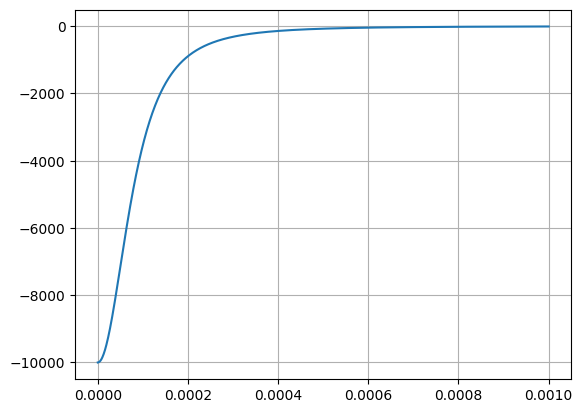

In [ ]:
#Grafiquemos
z_=np.linspace(0,0.001,1000)
plt.plot(z_,e(z_))#Grafica del Campo vs z
plt.grid()

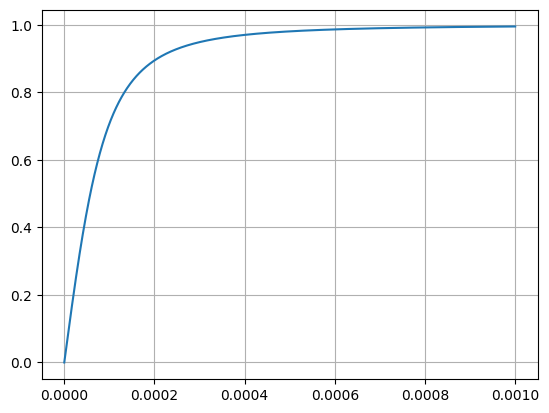

In [ ]:
plt.plot(z_,v(z_))#Grafica del Potencial vs z
plt.grid()

In [ ]:
misc.derivative(v,0.0002,dx=1e-8)

<ipython-input-91-26b6f9cac555>:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  misc.derivative(v,0.0002,dx=1e-8)


894.4271936817128

In [ ]:
l=[]
for i in z_:
  d= -misc.derivative(v,i,dx=1e-8)
  l.append(d)
  print(d)

<ipython-input-93-47b6c54f6ed0>:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d= -misc.derivative(v,i,dx=1e-8)


-9999.999950000001
-9998.497133761364
-9993.990942748325
-9986.488142158662
-9975.9999810059
-9962.542152817943
-9946.134740962398
-9926.80214893793
-9904.573016072254
-9879.480119135558
-9851.56026049247
-9820.854143452461
-9787.406235588907
-9751.2646208317
-9712.480841204962
-9671.109729134098
-9627.20923127075
-9580.840224837628
-9532.066327498645
-9480.953701786199
-9427.570855097267
-9371.988436344958
-9314.279030202266
-9254.516950042702
-9192.778030446547
-9129.139420351039
-9063.67937761332
-8996.477065986719
-8927.612355261183
-8857.165625328345
-8785.217574977522
-8711.849035980546
-8637.140793127384
-8561.173410742695
-8484.027066182898
-8405.781390655176
-8326.515317857997
-8246.306940590253
-8165.233375642678
-8083.370637190778
-8000.793518703197
-7917.575483532002
-7833.78856419048
-7749.503270237934
-7664.788504774256
-7579.711489394403
-7494.337697452891
-7408.730795452345
-7322.952592406229
-7237.062996814924
-7151.119981130271
-7065.179553283896
-6979.2957351294535
-

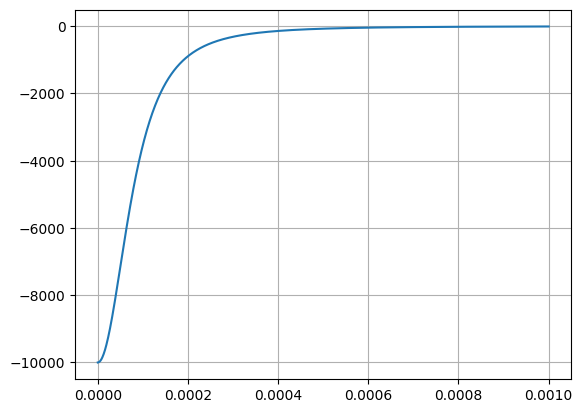

In [ ]:
plt.plot(z_,l)
plt.grid()
#Graficamos la funcion del campo encontrada con derivate

In [ ]:
#vectorizando
d= np.vectorize(misc.derivative) #vectoriza la funcion para que reciba un arreglo como argumento
df= -d(v,z_,dx=1e-8)


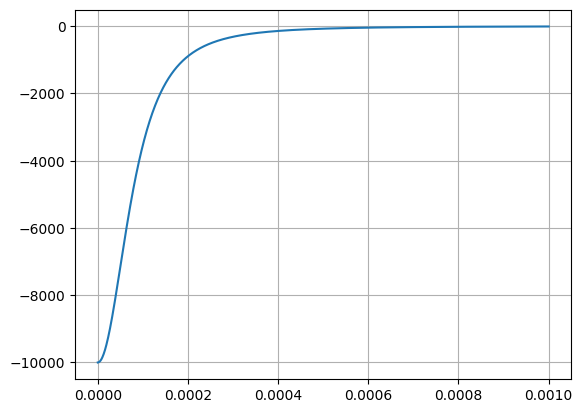

In [ ]:
#Graficamos la derivada ecnontrada con derivate usando vectorizacion
plt.plot(z_,df)
plt.grid()

In [ ]:
#Prueba funcion con condicionales observemos que se jode
def p(z,R,kq):
  if (z>=0):
    V = z*kq/np.sqrt(z**2+R**2)
  else:
    V = 0
  return V

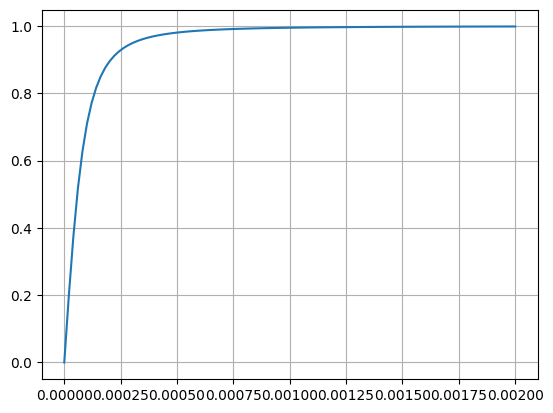

In [ ]:
z= np.linspace(0,0.002,100)
R=1e-4
kq= 1
p_= np.vectorize(p) #vectorizamos la funcion para que sirva el ciclo.
plt.plot(z,p_(z,R,kq))
plt.grid()#Graficacion del potencial

In [ ]:
#Calculemos el campo electirco para un punto
z0=0.1
R=1e-3
kg=1
dV= misc.derivative(p,0.1,dx=1e-6,args=(R,kg))
E=-dV
E

<ipython-input-100-74ae6968843b>:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dV= misc.derivative(p,0.1,dx=1e-6,args=(R,kg))


-0.0009998499805874417

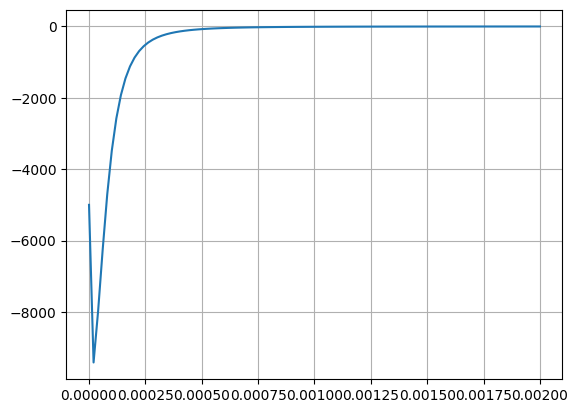

In [ ]:
#Calculemos el campo electrico para el arreglo de puntos z y grafiquemos
z= np.linspace(0,0.002,100)
R=1e-4
kq=1
derivative= np.vectorize(misc.derivative,excluded=['args']) #Vectorizamos excluyendo los argumentos
dV= derivative(p,z,dx=1e-6,args=(R,kq))
E= -dV
plt.plot(z,E)
plt.grid()#Graficacion del campo electrico

#Anillo
\begin(equation)
V= \frac(KQ_)

In [ ]:
#Ya tenemos el potencial para un anillo ahora creemos un programa que calcule el potencial tanto para un anillo como par aun disco)
#Prueba funcion con condicionales observemos que se jode
def p(z,R,kq,select):
  if (select=='anillo'):
    V = z*kq/np.sqrt(z**2+R**2)
  elif (select=='disco'):
    V= (kq*2/R**2)*(np.sqrt(z**2+R**2)-z)
  else:
    print('Error, the word select must be disco or anillo')
    V= None
  return V

p(0.001,1e-4,kq=1,select='otra cosa')

Error, the word select must be disco or anillo


In [ ]:
#Probemos
d=p(0.001,1e-4,kq=1,select='disco')
print(d)
a=p(0.001,1e-4,kq=1,select='anillo')
a

997.5124224177994


0.9950371902099892

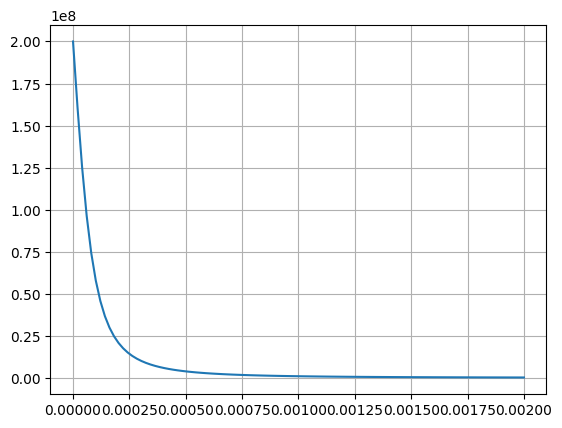

In [ ]:
#Derivemos y calculemos el campo electrico en anillo o disco
z= np.linspace(0,0.002,100)
R=1e-4
kq=1
select= 'disco'
derivative= np.vectorize(misc.derivative,excluded=['args']) #Vectorizamos excluyendo los argumentos
dV= derivative(p,z,dx=1e-6,args=(R,kq,select))
E= -dV
plt.plot(z,E)
plt.grid()#Graficacion del campo electrico del disco

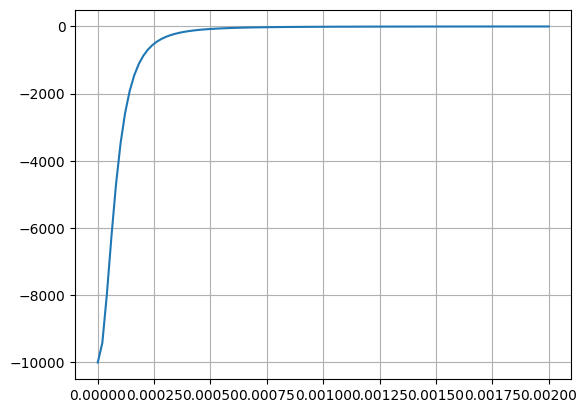

In [ ]:
#Derivemos y calculemos el campo electrico en anillo o disco
z= np.linspace(0,0.002,100)
R=1e-4
kq=1
select= 'anillo'
derivative= np.vectorize(misc.derivative,excluded=['args']) #Vectorizamos excluyendo los argumentos
dV= derivative(p,z,dx=1e-6,args=(R,kq,select))
E= -dV
plt.plot(z,E)
plt.grid()#Graficacion del campo electrico

In [ ]:
#caso cuando la palabra es diferente a disco o anillo

z= np.linspace(0,0.002,100)
R=1e-4
kq=1
select= 'otra cosa'

derivative= np.vectorize(misc.derivative,excluded=['args']) #Vectorizamos excluyendo los argumentos
try: #Usamos la funcion try and except para excluir el error
  dV= derivative(p,z,dx=1e-6,args=(R,kq,select))
  E= -dV
except:
  print('error, El programa fallo en calcular la derivada porque la palabra no es disco o anillo')




Error, the word select must be disco or anillo
error, El programa fallo en calcular la derivada porque la palabra no es disco o anillo


In [ ]:
#Creeemos un programa ejecutable con extension .py para guardar el campo electrico del disco
import numpy as np
from scipy import misc

z= np.linspace(0,0.002,100)
R=1e-4
kq=1
select= 'disco'

def p(z,R,kq,select):
  if (select=='anillo'):
    V = z*kq/np.sqrt(z**2+R**2)
  elif (select=='disco'):
    V= (kq*2/R**2)*(np.sqrt(z**2+R**2)-z)
  else:
    print('Error, the word select must be disco or anillo')
    V= None
  return V
  

derivative= np.vectorize(misc.derivative,excluded=['args']) #Vectorizamos excluyendo los argumentos
try: #Usamos la funcion try and except para excluir el error
  dV= derivative(p,z,dx=1e-6,args=(R,kq,select))
  E= -dV
  np.savetxt('Campo_electrico_Anillo.txt',E)
except:
  print('error, El programa fallo en calcular la derivada porque la palabra no es disco o anillo')



In [ ]:
E

array([2.00000000e+08, 1.60397867e+08, 1.25079189e+08, 9.63424291e+07,
       7.42983077e+07, 5.78715193e+07, 4.57266094e+07, 3.67043683e+07,
       2.99249729e+07, 2.47572909e+07, 2.07578608e+07, 1.76159576e+07,
       1.51124753e+07, 1.30912170e+07, 1.14393770e+07, 1.00743618e+07,
       8.93486545e+06, 7.97477609e+06, 7.15896910e+06, 6.46036865e+06,
       5.85786877e+06, 5.33484434e+06, 4.87807143e+06, 4.47693538e+06,
       4.12284328e+06, 3.80878358e+06, 3.52899247e+06, 3.27869893e+06,
       3.05392797e+06, 2.85134760e+06, 2.66814876e+06, 2.50195048e+06,
       2.35072440e+06, 2.21273421e+06, 2.08648695e+06, 1.97069332e+06,
       1.86423544e+06, 1.76614032e+06, 1.67555796e+06, 1.59174328e+06,
       1.51404097e+06, 1.44187288e+06, 1.37472742e+06, 1.31215057e+06,
       1.25373832e+06, 1.19913023e+06, 1.14800392e+06, 1.10007035e+06,
       1.05506978e+06, 1.01276830e+06, 9.72954810e+05, 9.35438396e+05,
       9.00046074e+05, 8.66620808e+05, 8.35019779e+05, 8.05112874e+05,
      

In [ ]:
!pwd

/content


In [ ]:
#Creeemos un programa ejecutable con extension .py para guardar el campo electrico del Anillo
import numpy as np
from scipy import misc

z= np.linspace(0,0.002,100)
R=1e-4
kq=1
select= 'anillo'

def p(z,R,kq,select):
  if (select=='anillo'):
    V = z*kq/np.sqrt(z**2+R**2)
  elif (select=='disco'):
    V= (kq*2/R**2)*(np.sqrt(z**2+R**2)-z)
  else:
    print('Error, the word select must be disco or anillo')
    V= None
  return V

derivative= np.vectorize(misc.derivative,excluded=['args']) #Vectorizamos excluyendo los argumentos
try: #Usamos la funcion try and except para excluir el error
  dV= derivative(p,z,dx=1e-6,args=(R,kq,select))
  E= -dV
  np.savetxt('Campo_electrico_Anillo.txt',E)
except:
  print('error, El programa fallo en calcular la derivada porque la palabra no es disco o anillo')



In [ ]:
E

array([-9.99950004e+03, -9.41726280e+03, -7.97050055e+03, -6.25468183e+03,
       -4.70549873e+03, -3.48250132e+03, -2.57734754e+03, -1.92477212e+03,
       -1.45679356e+03, -1.11927238e+03, -8.73094752e+02, -6.91069080e+02,
       -5.54518971e+02, -4.50603939e+02, -3.70427850e+02, -3.07758975e+02,
       -2.58176822e+02, -2.18504412e+02, -1.86428506e+02, -1.60243300e+02,
       -1.38675541e+02, -1.20763820e+02, -1.05774235e+02, -9.31407754e+01,
       -8.24226798e+01, -7.32735914e+01, -6.54190100e+01, -5.86396352e+01,
       -5.27589421e+01, -4.76338274e+01, -4.31475050e+01, -3.92040644e+01,
       -3.57242699e+01, -3.26422932e+01, -2.99031532e+01, -2.74606975e+01,
       -2.52759990e+01, -2.33160760e+01, -2.15528636e+01, -1.99623828e+01,
       -1.85240654e+01, -1.72202036e+01, -1.60354975e+01, -1.49566833e+01,
       -1.39722248e+01, -1.30720572e+01, -1.22473736e+01, -1.14904456e+01,
       -1.07944728e+01, -1.01534556e+01, -9.56208769e+00, -9.01566454e+00,
       -8.51000537e+00, -

In [ ]:
# Probemos cuando usamos un programa distinto
#Creeemos un programa ejecutable con extension .py para guardar el campo electrico del disco
import numpy as np
from scipy import misc

z= np.linspace(0,0.002,100)
R=1e-4
kq=1
select= 'otra cosa'

def p(z,R,kq,select):
  if (select=='anillo'):
    V = z*kq/np.sqrt(z**2+R**2)
  elif (select=='disco'):
    V= (kq*2/R**2)*(np.sqrt(z**2+R**2)-z)
  else:
    print('Error, the word select must be disco or anillo')
    V= None
  return V
  np.savetxt('Campo_electrico_Anillo.txt',E)

derivative= np.vectorize(misc.derivative,excluded=['args']) #Vectorizamos excluyendo los argumentos
try: #Usamos la funcion try and except para excluir el error
  dV= derivative(p,z,dx=1e-6,args=(R,kq,select))
  E= -dV
except:
  print('error, El programa fallo en calcular la derivada porque la palabra no es disco o anillo')

Error, the word select must be disco or anillo
error, El programa fallo en calcular la derivada porque la palabra no es disco o anillo
